# Introduction to Data Visualisation and Exploration,COMS4060A

## Neville Modise  

## Medical Insurance Analysis

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.1 Describing and Cleaning the Data

In [2]:
#describing the dataset
medical = pd.read_csv('insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges,premium
0,19,female,27.900,0,yes,southwest,16884.92400,350
1,18,male,33.770,1,no,southeast,1725.55230,200
2,28,male,33.000,3,no,southeast,4449.46200,100
3,33,male,22.705,0,no,northwest,21984.47061,200
4,32,male,28.880,0,no,northwest,3866.85520,350


Let's inspect the various aspects of our dataframe

In [3]:
#Determining the number of rows and columns
medical.shape

(1353, 8)

In [4]:
medical.describe()  #summary of all the numeric columns in the dataset

,age,bmi,children,charges,premium
count,1353.000000,1353.000000,1353.000000,1338.000000,1353.000000
mean,39.157428,30.670080,1.118256,13270.422265,287.730968
std,14.021578,6.093331,1.229290,12110.011237,152.363854
min,18.000000,15.960000,0.000000,1121.873900,100.000000
25%,26.000000,26.290000,0.000000,4740.287150,100.000000
50%,39.000000,30.400000,1.000000,9382.033000,350.000000
75%,51.000000,34.700000,2.000000,16639.912515,500.000000
max,64.000000,53.130000,5.000000,63770.428010,500.000000


In [5]:
#checking for duplicates
medical[medical.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges,premium


It seems the dataset doesn't have any duplicates

In [6]:
#Checking for missing values
medical.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker      15
region       0
charges     15
premium      0
dtype: int64

In [7]:
#drop the rows with missing values
medical = medical.dropna(axis=0)

Since the medical insurance are priced according
to the person we dropped the missing values

In [8]:
#Convert variables to relevant datatypes
medical['sex'] = medical['sex'].map({'male': 0, 'female': 1})
medical['smoker'] = medical['smoker'].map({'yes': 1, 'no': 0})
medical.head()

,age,sex,bmi,children,smoker,region,charges,premium
0,19,1,27.900,0,1,southwest,16884.92400,350
1,18,0,33.770,1,0,southeast,1725.55230,200
2,28,0,33.000,3,0,southeast,4449.46200,100
3,33,0,22.705,0,0,northwest,21984.47061,200
4,32,0,28.880,0,0,northwest,3866.85520,350


 - Males are encoded with 0, and females are encoded with 1.
 - Non-smokers are encoded with 0 and smokers are encoded 1

### 1.2 Exploring the Data

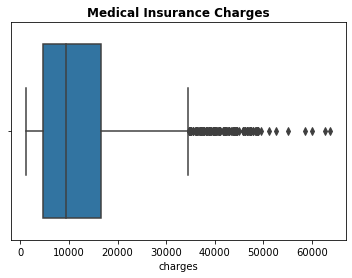

In [9]:
# Boxplot of Medical Insurance Charges:
sns.boxplot(medical['charges'])
plt.title('Medical Insurance Charges',fontweight="bold")
plt.show()

Using the boxplot, we have identified the outliers. We can say that values above 35 000 are the outliers.

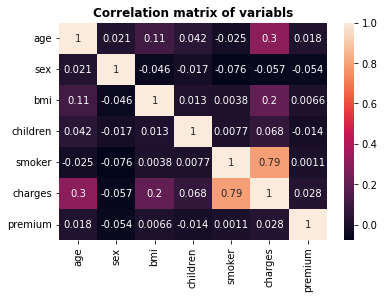

In [10]:
#Heatmap to see correlation between variables
sns.heatmap(medical.corr(), annot = True)
plt.title("Correlation matrix of variabls", fontweight="bold")
plt.show()

The correlation matrix indicates that smoker is strongly correlated with charges.

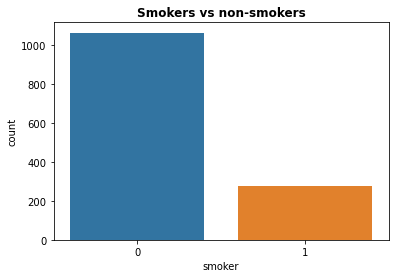

In [11]:
sns.countplot(medical['smoker'])
plt.title('Smokers vs non-smokers', fontweight="bold")
plt.show()

From the above plot, we can see that the are more non-smokers than smokers.

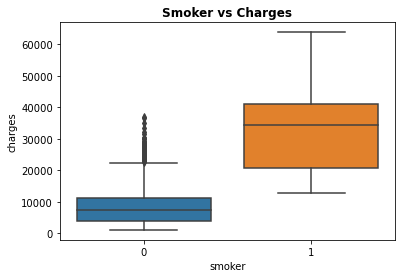

In [12]:
sns.boxplot(x = 'smoker', y = 'charges', data = medical)
plt.title('Smoker vs Charges',fontweight="bold")
plt.show()

Medical charges are more for smoker than the non-smokers.

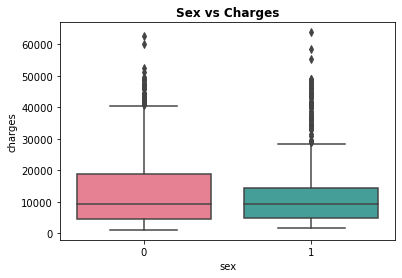

In [13]:
sns.boxplot(x = 'sex', y = 'charges', data = medical, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold")
plt.show()

From the above plot, we can see that males are charged more than females.

Text(0.5, 1.0, 'Children vs Charges')

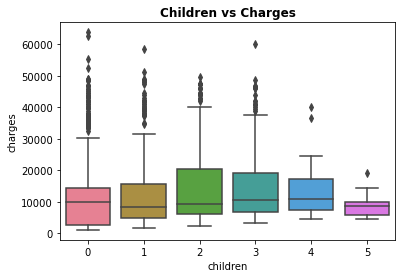

In [14]:
sns.boxplot(x = 'children', y = 'charges', data = medical,palette="husl")
plt.title('Children vs Charges',fontweight="bold")

People with more children tend to have higher medical costs overall as well

Text(0.5, 1.0, 'Children vs Age')

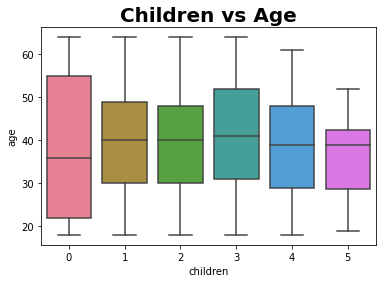

In [15]:
sns.boxplot(x = 'children', y = 'age', data = medical,palette="husl")
plt.title('Children vs Age',fontweight="bold", size=20)

People tend to have more children the older they get

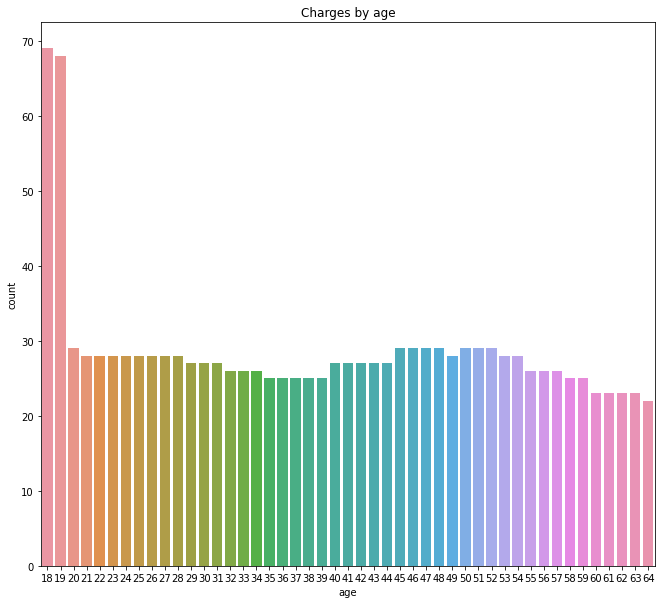

In [16]:
#plotting countplot for the age feature
plt.figure(figsize=(11,10))
sns.countplot(medical['age'])
plt.title('Charges by age')
plt.show()

From this count plot on age column its shows there is more populatiion people from the age of 18,19 compared to other age people

In [17]:
#Binning the age column.
bins = [17,35,55,1000]
slots = ['Young adult','Senior Adult','Elder']
medical['Age_range']=pd.cut(medical['age'],bins=bins,labels=slots)

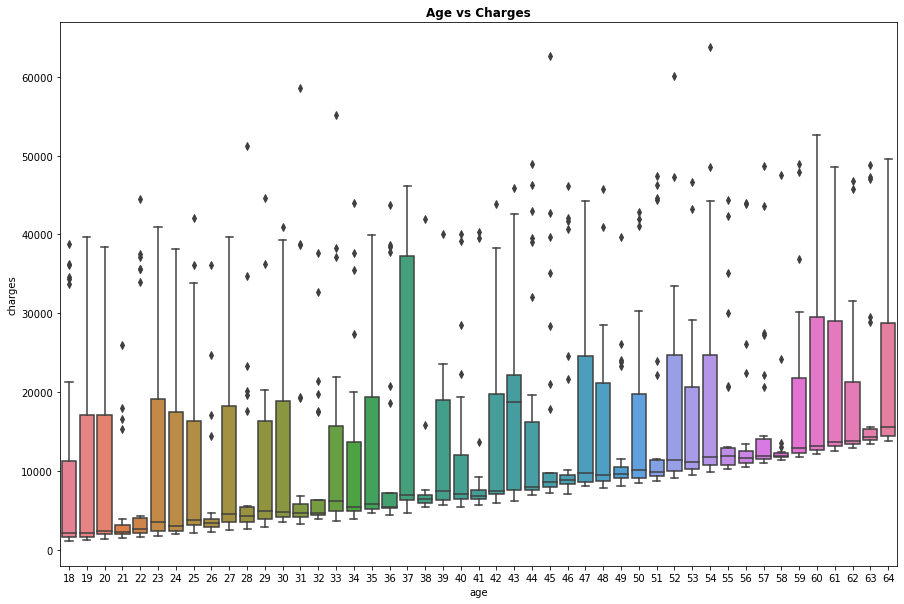

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'age', y = 'charges', data = medical, palette= 'husl')

plt.title('Age vs Charges',fontweight="bold")
plt.show()


Young adults are charged less than elderly people because they have fewer health risks. Geographical location can also have an influence on medical charges, this can due to availability of facilities for examples.

Text(0.5, 1.0, 'Smoker vs Charges')

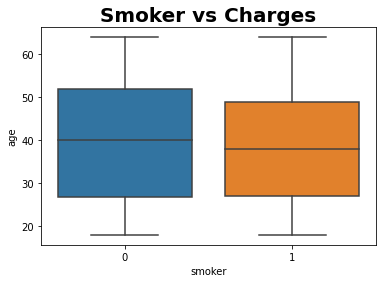

In [19]:
sns.boxplot(x = 'smoker', y = 'age', data = medical)
plt.title('Smoker vs Charges',fontweight="bold", size=20)

There's not a significant difference of smoking status in terms of age

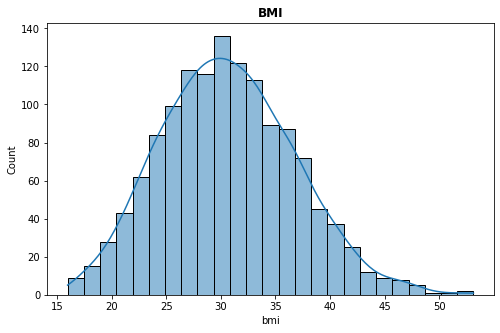

In [20]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(medical['bmi'], kde=True)
plt.title('BMI', fontweight="bold")
plt.show()

If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

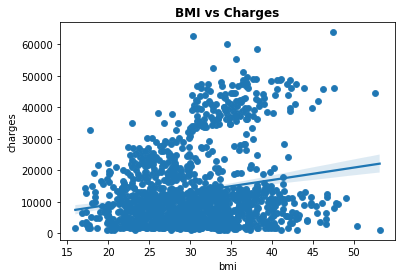

In [21]:
plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = medical['bmi'], y= medical['charges'])
plt.title('BMI vs Charges', fontweight='bold')
sns.regplot(x = medical['bmi'] , y = medical['charges'])
plt.show()

There is a postive relation between BMI and Charges as we can see it from the regression line, meaning as the BMI increases
so do the charges. i.e If you are obese you'll pay more, if you are not obese you'll pay less

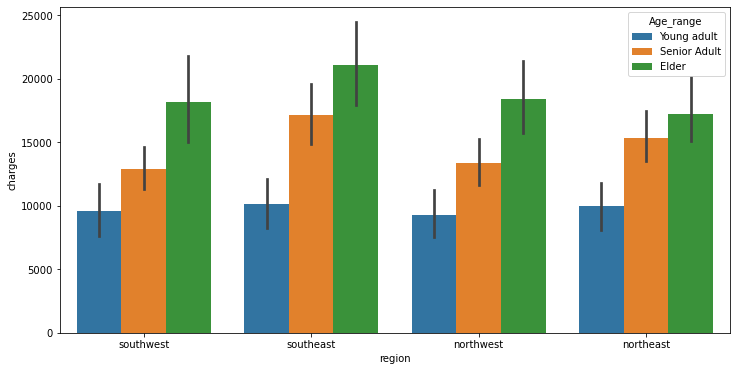

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='Age_range', data=medical)
plt.show()

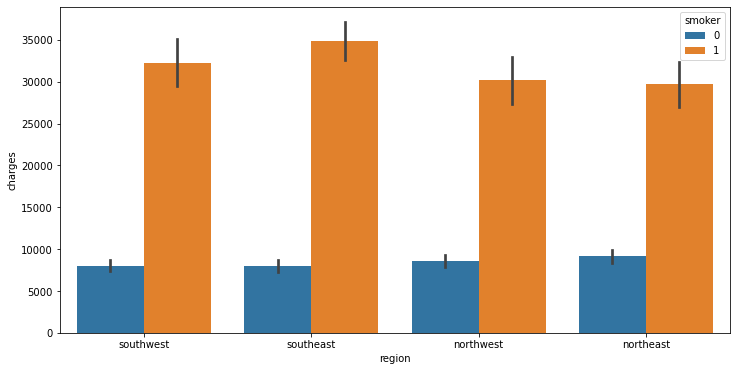

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=medical)
plt.show()

From the above plots we can see that medical charges are more in the Southeast due to smoking and a lot more older people in the region or lack of health facilities in the region

### 1.3 Identifying the Highest Risks

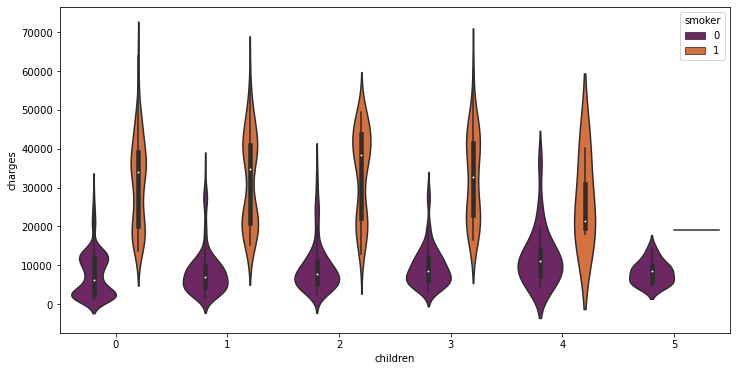

In [24]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'children', y = 'charges', data=medical, hue='smoker', palette='inferno')
plt.show()

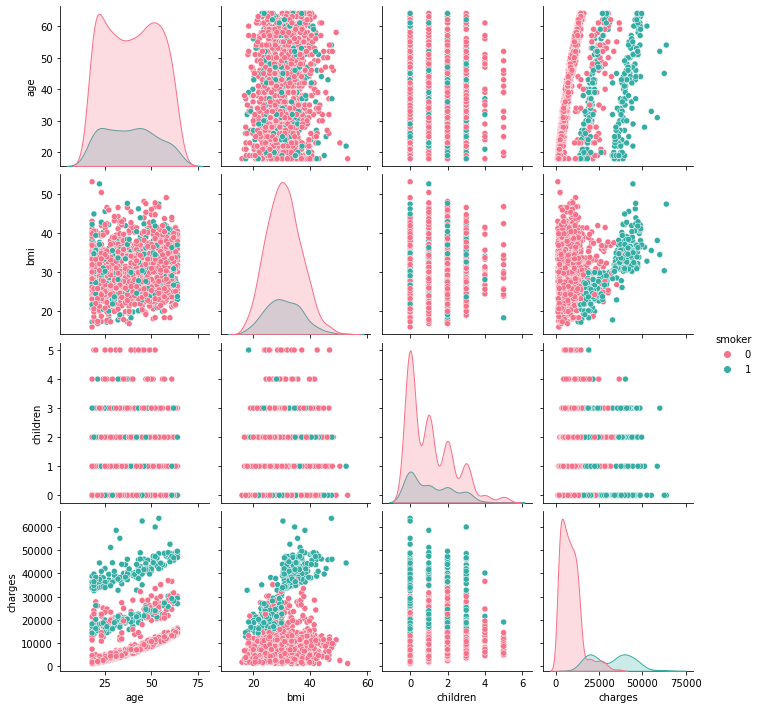

In [25]:
#Pairplot of all numerical variables
sns.pairplot(medical, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

The health hazards of smoking lead smokers to consume more medical resources than non-smokers, and thus greater medical expenditure. Age, BMI, number of children also drive the cost charges when smoker=True